In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [66]:
df = pd.read_csv("./mnist_train_small.csv")

print("Shape: ",df.shape)
df.head()


Shape:  (19999, 785)


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
np_array = df.iloc[:, 1:].to_numpy()  # Exclude the first column
np_array


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(19999, 784))

In [98]:
#TODO: step_1:  center the data 
centered_array = np_array- np.mean(np_array , axis=0)


In [99]:
#TODO: step_2: find the covarience matrix
cov_matrix =np.cov(centered_array, rowvar=False)

cov_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(784, 784))

In [100]:
# TODO: Step_2: Find eigen value and eigen vector 
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

print("Eigen_Values: \n", eigen_values)


Eigen_Values: 
 [ 3.33721160e+05+0.00000000e+00j  2.42964562e+05+0.00000000e+00j
  2.14452152e+05+0.00000000e+00j  1.87523148e+05+0.00000000e+00j
  1.67177121e+05+0.00000000e+00j  1.47160861e+05+0.00000000e+00j
  1.12075180e+05+0.00000000e+00j  9.92228188e+04+0.00000000e+00j
  9.45305772e+04+0.00000000e+00j  8.09047126e+04+0.00000000e+00j
  7.29978324e+04+0.00000000e+00j  6.88501049e+04+0.00000000e+00j
  5.85671878e+04+0.00000000e+00j  5.82035810e+04+0.00000000e+00j
  5.41361251e+04+0.00000000e+00j  5.02435763e+04+0.00000000e+00j
  4.49561988e+04+0.00000000e+00j  4.38641051e+04+0.00000000e+00j
  4.08480782e+04+0.00000000e+00j  3.95397626e+04+0.00000000e+00j
  3.72184200e+04+0.00000000e+00j  3.42422732e+04+0.00000000e+00j
  3.26277862e+04+0.00000000e+00j  3.11570626e+04+0.00000000e+00j
  3.00980731e+04+0.00000000e+00j  2.88026233e+04+0.00000000e+00j
  2.80179578e+04+0.00000000e+00j  2.67796291e+04+0.00000000e+00j
  2.55165712e+04+0.00000000e+00j  2.36518044e+04+0.00000000e+00j
  2.24548

In [101]:
print("\n Eigen_Vectors: \n", eigen_vectors)



 Eigen_Vectors: 
 [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 1.+0.j]]


In [102]:
# sorting the eigen values and vectors 
sorted_indices = np.argsort(eigen_values)[::-1]

eigen_values = eigen_values[sorted_indices]

eigen_vectors = eigen_vectors[:, sorted_indices]

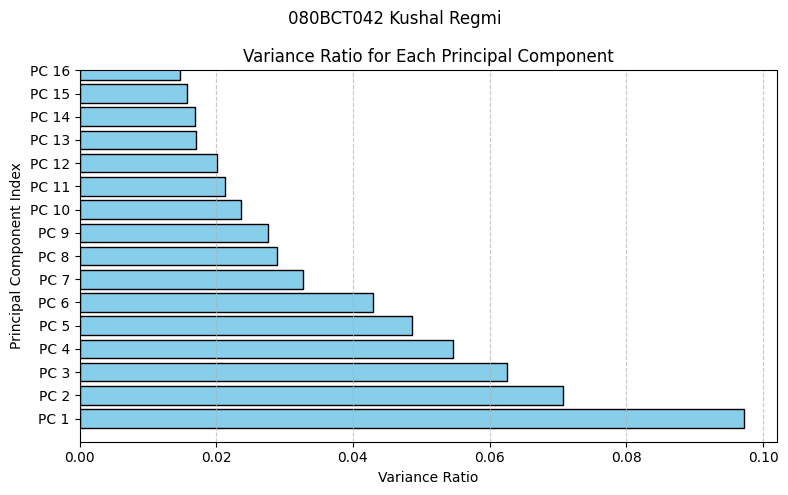

In [109]:
# Discard the imaginary part by taking the real part of eigenvalues
eigen_values = eigen_values.real

# Compute variance ratios
variance_ratios = eigen_values / np.sum(eigen_values)

# Plot the variance ratio as a horizontal bar chart
plt.figure(figsize=(8, 5))
y = np.arange(len(variance_ratios))  # Feature indices
plt.barh(y, variance_ratios, color='skyblue', edgecolor='black')

# Customize the plot
plt.suptitle("080BCT042 Kushal Regmi")
plt.title("Variance Ratio for Each Principal Component")
plt.xlabel("Variance Ratio")
plt.ylabel("Principal Component Index")
plt.yticks(y, labels=[f"PC {i + 1}" for i in y])  # Label each principal component
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Limit y-axis according to the number of components
plt.ylim(-1, 15)

plt.tight_layout()
plt.show()


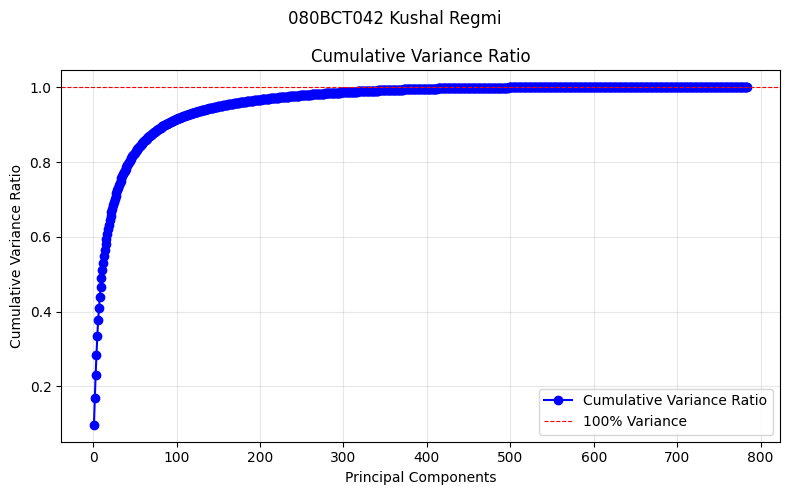

In [111]:
# calculating the cumulative variance
cumulative_variance_ratios = np.cumsum(variance_ratios)

#  Plot the cumulative variance ratio
plt.figure(figsize=(8, 5))
x = np.arange(1, len(cumulative_variance_ratios) + 1)  # Component indices
plt.plot(x,
         cumulative_variance_ratios,
         marker='o',
         linestyle='-',
         color='b', 
         label="Cumulative Variance Ratio"
         )

# Customize the plot
plt.suptitle("080BCT042 Kushal Regmi")

plt.title("Cumulative Variance Ratio")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.axhline(y=1, color='r', linestyle='--', linewidth=0.8, label="100% Variance")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

Number of components to explain at least 93.5% variance: 126


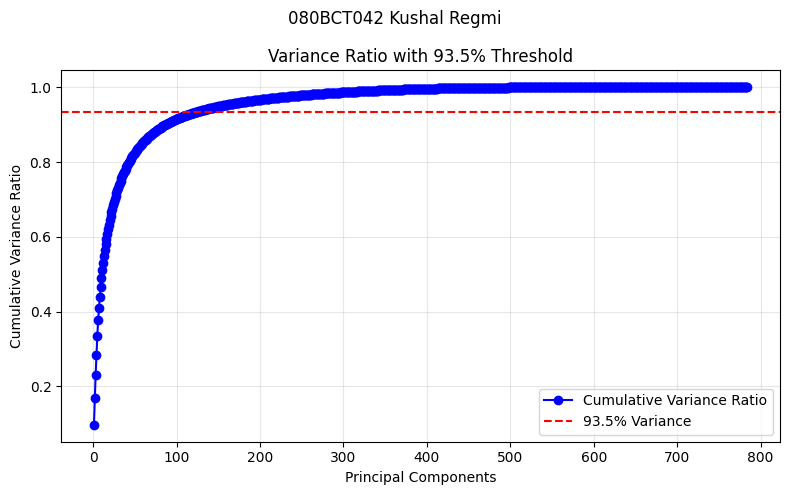

In [112]:
# select top principal components that explain at least (90 + your_roll_number / 12)% variance of data.
threshold = (90 + 42/ 12)/ 100 
# threshold = .95
num_components = np.argmax(cumulative_variance_ratios >= threshold) + 1  

print(f"Number of components to explain at least {threshold*100}% variance: {num_components}")

#  Select the top features (eigenvectors) corresponding to the selected components
selected_eigen_vectors = eigen_vectors[:, :num_components]

# Plot the cumulative variance ratio to confirm the selection visually
plt.figure(figsize=(8, 5))
x = np.arange(1, len(cumulative_variance_ratios) + 1)
plt.plot(x,
         cumulative_variance_ratios,
         marker='o', 
         linestyle='-',
         color='b',
         label="Cumulative Variance Ratio"
         )
plt.axhline(y=threshold, 
            color='r',
            linestyle='--',
            label=f"{threshold*100}% Variance"
            )

plt.suptitle("080BCT042 Kushal Regmi")
plt.title(f"Variance Ratio with {threshold*100}% Threshold")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [90]:
# data_pca: 
data_pca = np.dot(centered_array, selected_eigen_vectors)

user_roll_number = 42  # my roll number
indices = [user_roll_number, 2 * user_roll_number, 4 * user_roll_number, 8 * user_roll_number]

data_pca.size

2519874

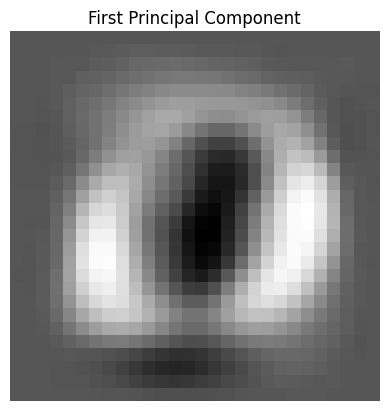

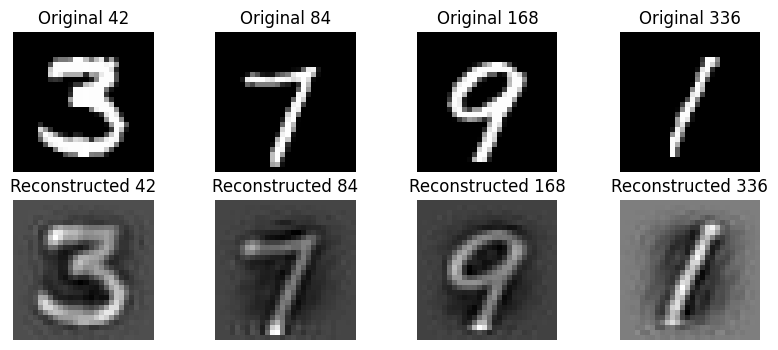

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load Data
data = pd.read_csv('./mnist_train_small.csv')  # Assuming your MNIST data is in 'mnist.csv'
X = data.iloc[:, 1:].values  # Exclude the label column
y = data.iloc[:, 0].values   # Labels (not used for PCA)

# Step 2: Centering the Data
scaler = StandardScaler()
X_centered = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=0.935)  # Set variance threshold (you can modify this)
X_pca = pca.fit_transform(X_centered)

# Step 4: Reconstruct Images
reconstructed_images = pca.inverse_transform(X_pca)

# Step 5: Plotting Original vs Reconstructed Images
def plot_images(original, reconstructed, indices):
    plt.figure(figsize=(10, 4))
    for i, index in enumerate(indices):
        plt.subplot(2, len(indices), i + 1)
        plt.imshow(original[index].reshape(28, 28), cmap='gray')
        plt.title(f'Original {index}')
        plt.axis('off')
        
        plt.subplot(2, len(indices), len(indices) + i + 1)
        plt.imshow(reconstructed[index].reshape(28, 28), cmap='gray')
        plt.title(f'Reconstructed {index}')
        plt.axis('off')
    
    plt.show()

# Step 6: Plotting the First Principal Component
plt.imshow(pca.components_[0].reshape(28, 28), cmap='gray')
plt.title('First Principal Component')
plt.axis('off')
plt.show()

# Example call to plot original and reconstructed images
indices_to_plot = [user_roll_number, 2 * user_roll_number, 4 * user_roll_number, 8 * user_roll_number]
plot_images(X, reconstructed_images, indices_to_plot)
